## Problem Statement

### Context

AllLife Bank is a US bank that has a growing customer base. The majority of these customers are liability customers (depositors) with varying sizes of deposits. The number of customers who are also borrowers (asset customers) is quite small, and the bank is interested in expanding this base rapidly to bring in more loan business and in the process, earn more through the interest on loans. In particular, the management wants to explore ways of converting its liability customers to personal loan customers (while retaining them as depositors).

A campaign that the bank ran last year for liability customers showed a healthy conversion rate of over 9% success. This has encouraged the retail marketing department to devise campaigns with better target marketing to increase the success ratio.

You as a Data scientist at AllLife bank have to build a model that will help the marketing department to identify the potential customers who have a higher probability of purchasing the loan.

### Objective

To predict whether a liability customer will buy personal loans, to understand which customer attributes are most significant in driving purchases, and identify which segment of customers to target more.

### Data Dictionary
* `ID`: Customer ID
* `Age`: Customer’s age in completed years
* `Experience`: #years of professional experience
* `Income`: Annual income of the customer (in thousand dollars)
* `ZIP Code`: Home Address ZIP code.
* `Family`: the Family size of the customer
* `CCAvg`: Average spending on credit cards per month (in thousand dollars)
* `Education`: Education Level. 1: Undergrad; 2: Graduate;3: Advanced/Professional
* `Mortgage`: Value of house mortgage if any. (in thousand dollars)
* `Personal_Loan`: Did this customer accept the personal loan offered in the last campaign? (0: No, 1: Yes)
* `Securities_Account`: Does the customer have securities account with the bank? (0: No, 1: Yes)
* `CD_Account`: Does the customer have a certificate of deposit (CD) account with the bank? (0: No, 1: Yes)
* `Online`: Do customers use internet banking facilities? (0: No, 1: Yes)
* `CreditCard`: Does the customer use a credit card issued by any other Bank (excluding All life Bank)? (0: No, 1: Yes)

## Importing necessary libraries

In [ ]:
# Installing the libraries with the specified version.
#!pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 scikit-learn==1.2.2 sklearn-pandas==2.2.0 -q --user

# The solution was developed using a local installation of Anaconda using these libraries and versions:
#base python 3.12.7
#numpy 1.26.4
#pandas 2.2.3
#matplotlib 3.9.2
#seaborn 0.13.2
#scikit-learn 1.5.1
# sklearn-pandas  # NOT used






**Note**:

1. After running the above cell, kindly restart the notebook kernel (for Jupyter Notebook) or runtime (for Google Colab), write the relevant code for the project from the next cell, and run all cells sequentially from the next cell.

2. On executing the above line of code, you might see a warning regarding package dependencies. This error message can be ignored as the above code ensures that all necessary libraries and their dependencies are maintained to successfully execute the code in this notebook.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DecisionTree
from sklearn import tree as sktree
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,recall_score, precision_score
from sklearn.preprocessing import LabelEncoder

import warnings
warnings.filterwarnings("ignore")   



## Loading the dataset

In [2]:
pd_original= pd.read_csv("loan_modelling.csv")

## Data Overview

* Observations
* Sanity checks

In [ ]:
# Display the first few rows of the dataset
pd_original.head(20)
# Display the last few rows of the dataset
pd_original.tail(20)
# Display the shape of the dataset , 5000 # rows and 14 columns
print(pd_original.shape)
# Display the columns and datatypes of the dataset, #14 are a mix of integer and float
pd_original.info()
# Display basic statistics of the dataset
pd_original.describe(include='all')  # include='all' to get stats for categorical columns as well
# Check for missing values
print(pd_original.isnull().sum())
#check for duplicate rows
duplicate_rows = pd_original.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")

null_count= 0 
na_count = 0
for col in pd_original.columns:
    if pd_original[col].isnull().sum() > 0:
        null_count += 1
        print(f"Column '{col}' has null values.")
    if pd_original[col].isna().sum() > 0:
        na_count += 1
        print(f"Column '{col}' has NaN values.")    
print(f"Total columns with null values: {null_count}")
print(f"Total columns with NaN values: {na_count}")


# Check if the 'ID' column is unique for each row and is not needed for analysis
if pd_original['ID'].nunique() == len(pd_original):
    pd_clean = pd_original.drop(['ID'], axis=1)  # Drop the 'ID' column if it is unique for each row
      



## Exploratory Data Analysis.

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**Questions**:

1. What is the distribution of mortgage attribute? Are there any noticeable patterns or outliers in the distribution?
2. How many customers have credit cards?
3. What are the attributes that have a strong correlation with the target attribute (personal loan)?
4. How does a customer's interest in purchasing a loan vary with their age?
5. How does a customer's interest in purchasing a loan vary with their education?

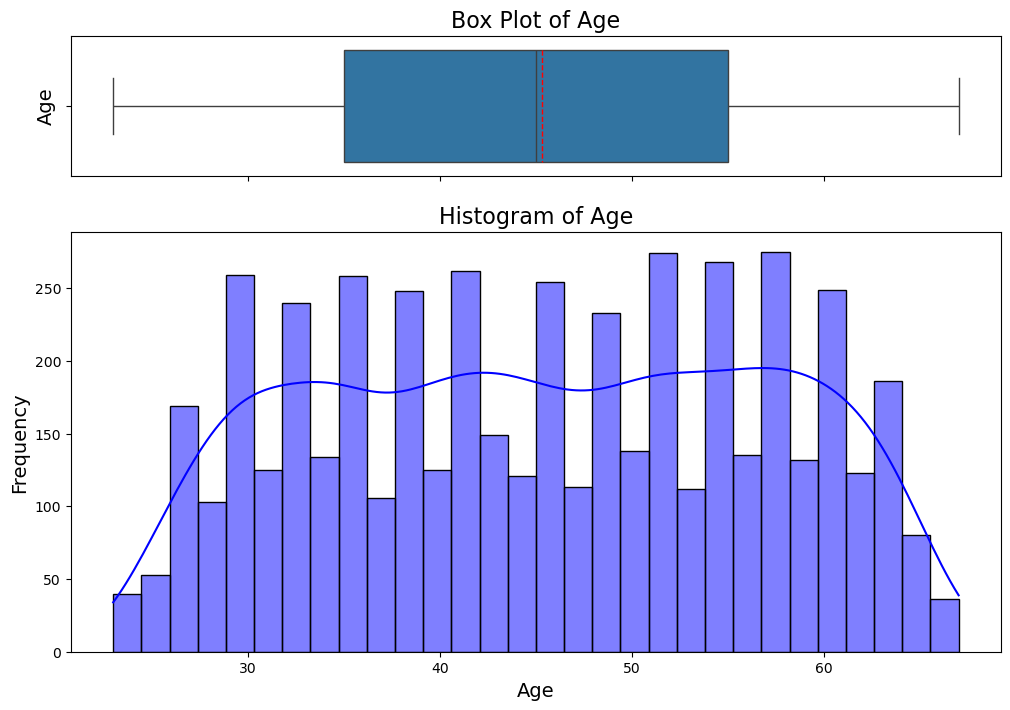

In [ ]:
# box plot distribution of features and target variable Personal Loan

def eda_plots(df, target_col):
    """
    Generate box plots for each feature in the DataFrame against the target variable.
    
    Parameters:
    df (DataFrame): The DataFrame containing the data.
    target_col (str): The name of the target column.
    """
    figsize = (12, 8)  # Set the figure size for the plots
    bins = 30  # Number of bins for the histogram
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )

    #box plot
    sns.boxplot(x=target_col, data=df, ax=ax_box2,showmeans=True, meanline=True, meanprops={"color": "red", "linestyle": "--"})
    ax_box2.set_title(f'Box Plot of {target_col}', fontsize=16)
    ax_box2.set_ylabel(target_col, fontsize=14) 
    ax_box2.set_xlabel('')  # No x-label for the box plot

    # histogram 
    sns.histplot(df[target_col], kde=True, ax=ax_hist2, color='blue', bins=bins)
    ax_hist2.set_title(f'Histogram of {target_col}', fontsize=16)
    ax_hist2.set_xlabel(target_col, fontsize=14)
    ax_hist2.set_ylabel('Frequency', fontsize=14)
    
    # for feature in features:
    #     plt.figure(figsize=(10, 6))
    #     sns.boxplot(x=target_col, y=feature, data=df)
    #     plt.title(f'Box Plot of {feature} vs {target_col}')
    #     plt.show()

eda_plots(pd_clean, 'Age')
#sns.boxplot(x="Personal_Loan", y='Age', data=pd_clean, showmeans=True, meanline=True, meanprops={"color": "red", "linestyle": "--"})



## Data Preprocessing

* Missing value treatment
* Feature engineering (if needed)
* Outlier detection and treatment (if needed)
* Preparing data for modeling
* Any other preprocessing steps (if needed)

## Model Building

### Model Evaluation Criterion

*


### Model Building

## Model Performance Improvement

## Model Performance Comparison and Final Model Selection

## Actionable Insights and Business Recommendations


* What recommedations would you suggest to the bank?

___